# Experiment list :  Question No - 04

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize and reshape the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# Create data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

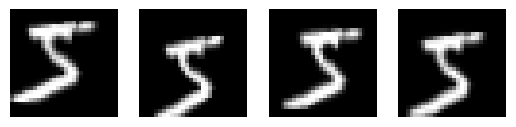

In [7]:
# Get a single image and generate 4 augmented versions
image = X_train[0]
aug_iter = datagen.flow(image.reshape((1,) + image.shape))

for i in range(4):
    plt.subplot(1, 4, i + 1)
    aug_image = next(aug_iter)[0]
    plt.imshow(aug_image.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [8]:
# Create model function
def create_model():
    """Create DNN model for MNIST classification."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [9]:
# Train model on original data
print("Training with original data...")
model_original = create_model()
history_original = model_original.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Training with original data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7091 - loss: 0.8910 - val_accuracy: 0.9447 - val_loss: 0.1830
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9217 - loss: 0.2593 - val_accuracy: 0.9613 - val_loss: 0.1322
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9419 - loss: 0.1980 - val_accuracy: 0.9642 - val_loss: 0.1208
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9503 - loss: 0.1662 - val_accuracy: 0.9656 - val_loss: 0.1119
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9551 - loss: 0.1462 - val_accuracy: 0.9701 - val_loss: 0.1037
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9604 - loss: 0.1317 - val_accuracy: 0.9703 - val_loss: 0.1065
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9636 - loss: 0.1222 - val_accuracy: 0.9705 - val_loss: 0.1042
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1135 - val_accuracy: 0.

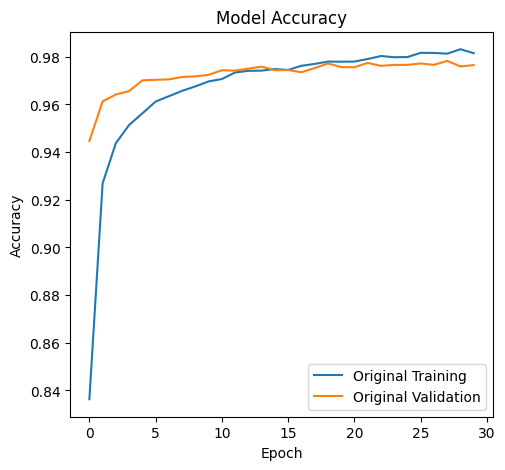

In [10]:
# Plot training history comparison
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Training')
plt.plot(history_original.history['val_accuracy'], label='Original Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [11]:
# Train model on augmented data
print("\nTraining with augmented data...")
model_augmented = create_model()
history_augmented = model_augmented.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=20,
    steps_per_epoch=len(X_train) // 128,
    validation_data=(X_test, y_test),
    verbose=1
)


Training with augmented data...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.5113 - loss: 1.4411 - val_accuracy: 0.9372 - val_loss: 0.2368
Epoch 2/20
  1/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8359 - loss: 0.5119

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8359 - loss: 0.5119 - val_accuracy: 0.9370 - val_loss: 0.2357
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8261 - loss: 0.5615 - val_accuracy: 0.9512 - val_loss: 0.1601
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.3764 - val_accuracy: 0.9512 - val_loss: 0.1605
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8655 - loss: 0.4374 - val_accuracy: 0.9579 - val_loss: 0.1323
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.4105 - val_accuracy: 0.9587 - val_loss: 0.1317
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8801 - loss: 0.3859 - val_accuracy: 0.9655 - val_loss: 0.1167
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9062 - loss: 0.2855 - val_accuracy: 0.9643 - val_loss: 0.1166
Epoch 9/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8914 - loss: 0.3593 - val_accuracy: 0

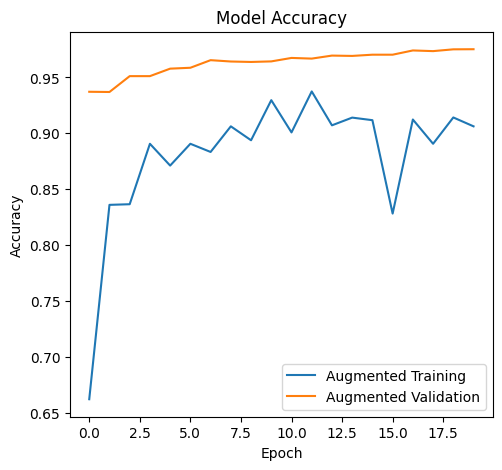

In [12]:
# Plot training history comparison
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Augmented Training')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [13]:
# Evaluate both models
print("\nEvaluation on test set:")
print("Original Model:")
original_scores = model_original.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {original_scores[1]:.4f}")

print("\nAugmented Model:")
augmented_scores = model_augmented.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {augmented_scores[1]:.4f}")


Evaluation on test set:
Original Model:
Test accuracy: 0.9759

Augmented Model:
Test accuracy: 0.9753


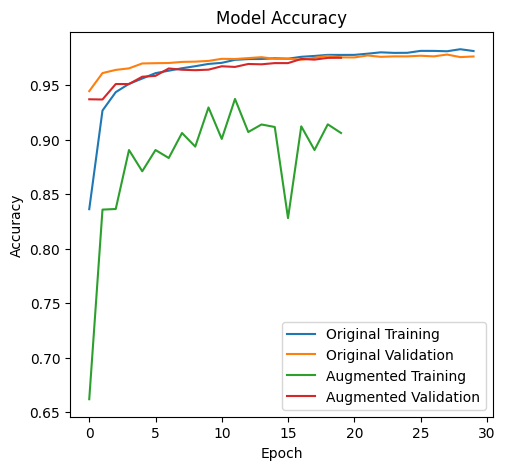

In [14]:
# Plot training history comparison
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Training')
plt.plot(history_original.history['val_accuracy'], label='Original Validation')
plt.plot(history_augmented.history['accuracy'], label='Augmented Training')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


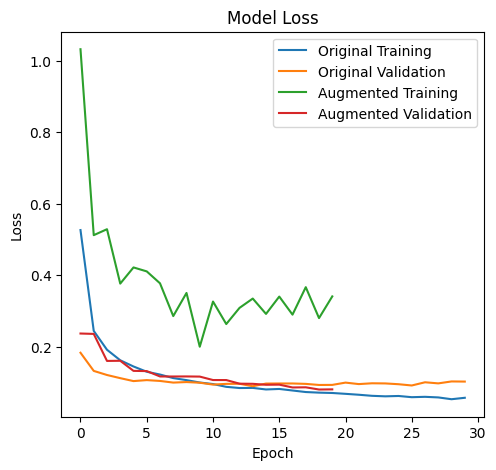

In [15]:
# Plot training history comparison
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_original.history['loss'], label='Original Training')
plt.plot(history_original.history['val_loss'], label='Original Validation')
plt.plot(history_augmented.history['loss'], label='Augmented Training')
plt.plot(history_augmented.history['val_loss'], label='Augmented Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()